# 24. Perceptron

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/24.Perceptron.ipynb)

(Based on https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537)

In this notebook, we will implement the Perceptron algorithm. It is the simplest single-layer neural network algorithm and illustrates some of the fundamental aspects of artifical neural networks.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Neuron.svg/640px-Neuron.svg.png" alt="Neuron" align="center" style="width:500px; float:center"/>

### Create a Dataset

Before we apply the clustering technique, we create a dataset of materials with experimental bandgaps.

<class 'numpy.ndarray'>
[1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1
 0 0]


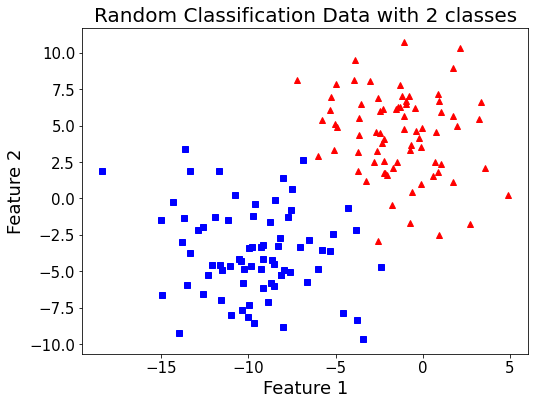

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150, n_features=2,
                           centers=2, cluster_std=3,
                           random_state=1)
print(type(X))
print(y)
#Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
plt.title('Random Classification Data with 2 classes', fontsize=20)
plt.show()

The dataset includes two classes, red and green. The goal for the Perceptron algorithm is to learn an optimal straight line that separates the two classes.

The Perceptron algorithm, sums the input features using weights and applies a Unit Step Function of Heaviside function to that sum:
$$
\sigma(z) = \begin{cases}
0 \,\, \text{if} \,\, z < 0 \\
1 \,\, \text{if} \,\, z \ge 0
\end{cases}
$$

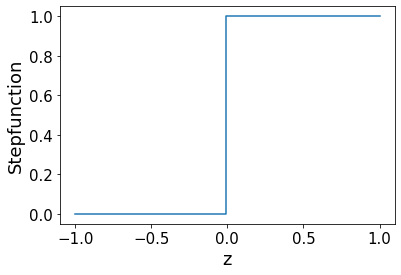

In [2]:
def step_func(z):
        return np.heaviside(z, 1)

z = np.linspace(-1, 1, 100)
sigma = step_func(z)

plt.step(z, sigma)
plt.xlabel('z', fontsize=18)
plt.ylabel('Stepfunction', fontsize=18)
plt.show()

### Perceptron

The Perceptron algorithm is illustrated by the following flowchart. For every training example, we first take the dot product of the input features and the parameters, $\theta$. Then, we apply the Unit Step Function to make the prediction, $\hat y$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Computer.Science.AI.Neuron.svg/640px-Computer.Science.AI.Neuron.svg.png" alt="Perceptron" align="center" style="width:500px; float:center"/>

If the prediction is wrong and the model has misclassified that data point, we update for the parameters, $\theta$. We don’t update when the prediction is correct.

### Perceptron Update Rule

The Perceptron update rule is similar to the Gradient Descent update rule:
$$
\theta_{t+1} = \theta_t + \eta \left ( {\bf y} -\sigma(\theta \cdot {\bf x}) \right ) {\bf x}
$$

In [3]:
def perceptron(X, y, eta, epochs):
    # X      = Inputs.
    # y      = labels/target.
    # eta    = learning rate.
    # epochs = Number of iterations.
    
    # m = number of training examples
    # n = number of features 
    m, n = X.shape
    
    # Initializing parapeters theta to zero
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training
    for epoch in range(epochs):
        
        # Variable to store the number of misclassified points
        n_miss = 0
        
        # Looping for every example.
        for idx, x_i in enumerate(X):
       
            # Insering 1 for bias, X0 = 1
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            
            # Calculating prediction/hypothesis
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += eta*(y[idx] - y_hat)*x_i
                
                # Incrementing by 1
                n_miss += 1
        
                # Appending number of misclassified examples
                # at every iteration.
                n_miss_list.append(n_miss)
            
    return theta, n_miss_list

In [4]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'r^')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs')
    plt.xlabel('Feature 1', fontsize=19)
    plt.ylabel('Feature 2', fontsize=18)
    plt.title('Perceptron Algorithm', fontsize=20)
    plt.plot(x1, x2, 'y-')

[[-0.21      ]
 [-0.04516909]
 [-0.02704434]]


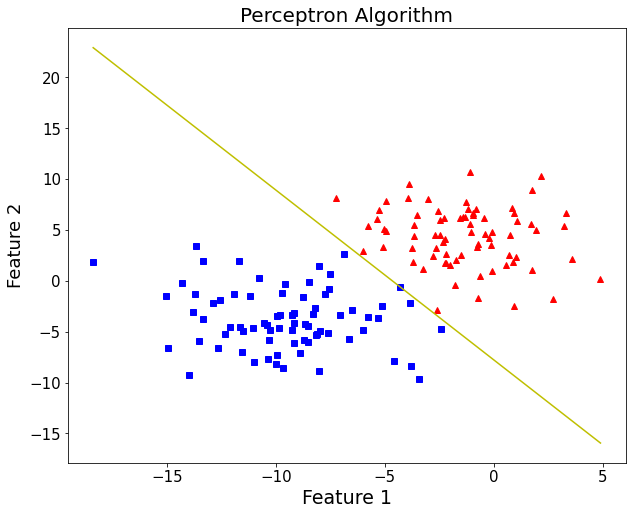

In [5]:
theta, miss_l = perceptron(X, y, 0.01, 20)
print(theta)
plot_decision_boundary(X, theta)

We observe that we are able to separate the red and blue classes quite well.

How about changing the random seed and the standard deviation for generating the data to explore how the Perceptron works for other distributions.

## Simple Perceptron with scikit-learn

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
import sklearn.metrics as metric
import numpy as np

In [7]:
from sklearn.linear_model import Perceptron

# Create a simple data set for the AND function
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

clf = Perceptron()

clf.fit(X,y)

print('score:', clf.score(X, y))
print('predictions:', clf.predict(X))
print('expected:', y)

score: 1.0
predictions: [0 0 0 1]
expected: [0 0 0 1]


### Question

Modify the data into other logical functions, such as OR, NOT, NAND, XOR. What do you observe? Can the single neuron perceptron algorithm model these logical functions?

### Multilayer Perceptron

Generalizing the perceptron algorithm into one that includes multiple neurons and several layers of neurons results in a neural network. We can use the multilayer perceptron algorithm in scikit-learn `MLPClassifier` to train a classifier using a neural network.

In [8]:
# Function to fit a 2D classification model and plot the decision boundary
# Source: https://towardsdatascience.com/easily-visualize-scikit-learn-models-decision-boundaries-dd0fb3747508
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    y_pred=model.predict(reduced_data)                 # prediction
    print(y_pred)                                      # show the output
    accuracy=metric.accuracy_score(np.array(y).flatten(), np.array(y_pred).flatten(), normalize=True)
    print('acuracy=',accuracy)                         # show accracy score
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 0.2, reduced_data[:, 0].max() + 0.2
    y_min, y_max = reduced_data[:, 1].min() - 0.2, reduced_data[:, 1].max() + 0.2
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    fig = plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=1-y, alpha=0.8)
    plt.xlabel("Feature 1",fontsize=15)
    plt.ylabel("Feature 2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

[0 1 1 0]
acuracy= 1.0


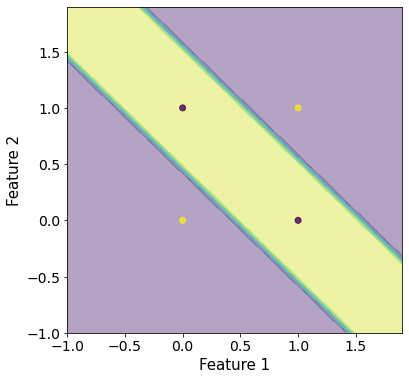

In [9]:
# Create a data set for the XOR function
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Train a 2-layer neural network with two neurons in the hidden layer
plot_decision_boundaries(X, y,
                         MLPClassifier,
                         solver='lbfgs', hidden_layer_sizes=(2),
                         activation='logistic', random_state=4)
plt.show()

### Question

- Modify the parameters for the `MLPClassifier` to see how sensitive the optimized classifier is to the activation function`activation`, the optimization method `solver`, and the initial random guess `random_state`.  